In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSVs

In [343]:
reviews = pd.read_csv('../storage/review.csv')
courses = pd.read_csv('../storage/course.csv')

In [315]:
reviews_and_courses = reviews_raw.merge(courses, how='inner', left_on='course_id', right_on='id', suffixes=('_review', '_course'))

In [333]:
reviews_raw.head()

,id,comment,stars,course_id,user_id
0,1,"muy buen curso, muy buena profesora. es unos d...",5.0,1,1
1,2,"Excelente curso, de los mejores que hasta el m...",5.0,1,2
2,3,"los videos fueron cortos y muy concretos, lo c...",5.0,1,3
3,4,Ayudo a mejorar la capacidad de toma de decisi...,5.0,1,4
4,5,Pensar fuera de la caja es una característica ...,5.0,1,5


In [6]:
courses.head()

,id,name,path
0,1,Curso de Design Thinking con Minds Garage,/cursos/design-thinking/
1,2,Curso de Introducción al Diseño,/cursos/fundamentos-diseno/
2,3,Curso de Fundamentos de Diseño de Interfaces ...,/cursos/diseno-interfaces-ux/
3,4,Curso de Arquitectura de la Información con Us...,/cursos/arquitectura-informacion/
4,5,Curso de Illustrator,/cursos/illustrator/


# Best Courses

In [441]:
# Calculate total reviews
courses['total_reviews'] = courses.id.apply(lambda id: reviews[reviews.course_id == id].shape[0])

In [442]:
# Calculate stars for each course
def get_porcent_star_by_course(course:int, total_reviews:int, stars: float):
    stars = reviews[np.logical_and(reviews.course_id == course, reviews.stars == stars)].shape[0]
    return stars/total_reviews if stars else 0
i = 0.0
while i <= 5.0:
    courses[f'star_{i}'] = courses[['id', 'total_reviews']].apply(lambda x:
                                get_porcent_star_by_course(course=x.values[0],
                                                           total_reviews=x.values[1],
                                                           stars=i), axis=1)
    i += 0.5

courses[f'stars_mean'] = courses[['id', 'total_reviews']].apply(lambda x:
                                get_porcent_star_by_course(course=x.values[0],
                                                           total_reviews=x.values[1],
                                                           stars=i), axis=1)


In [444]:
# Remove course without reviews
courses.drop(courses[courses.total_reviews == 0].index, inplace=True)

In [445]:
courses['stars_mean'] = courses.id.apply(lambda id: reviews[reviews.course_id == id].stars.mean())
courses['stars_median'] = courses.id.apply(lambda id: reviews[reviews.course_id == id].stars.median())

In [446]:
courses.sort_values(['stars_mean', 'total_reviews'])

,id,name,path,star_0.0,star_0.5,star_1.0,star_1.5,star_2.0,star_2.5,star_3.0,star_3.5,star_4.0,star_4.5,star_5.0,total_reviews,stars_mean,stars_median
275,275,Curso de Gestión de Servidores con Rust,/cursos/servidores-rust/,0.000000,0,0.148148,0.111111,0.111111,0.074074,0.222222,0.000000,0.148148,0.111111,0.074074,27,2.851852,3.0
480,427,Curso de Symfony Framework,/cursos/symfony-framework/,0.000000,0,0.110092,0.045872,0.064220,0.045872,0.183486,0.119266,0.073394,0.055046,0.302752,109,3.444954,3.5
498,445,Curso de Go Avanzado 2016,/cursos/go-avanzado-2016/,0.000000,0,0.068966,0.068966,0.103448,0.000000,0.172414,0.034483,0.172414,0.034483,0.344828,29,3.586207,4.0
494,441,Curso de Programación de Videojuegos 3D con Un...,/cursos/unity-3d-old/,0.000000,0,0.035088,0.070175,0.070175,0.070175,0.087719,0.105263,0.140351,0.070175,0.350877,57,3.719298,4.0
403,499,Curso de Fundamentos de Estadística y Análisis...,/cursos/estadistica-python/,0.000000,0,0.056122,0.025510,0.051020,0.102041,0.081633,0.096939,0.209184,0.040816,0.336735,196,3.739796,4.0
299,299,Curso de Arquitectura de Aplicaciones con Dock...,/cursos/arquitectura-docker/,0.000000,0,0.027778,0.000000,0.069444,0.069444,0.152778,0.152778,0.194444,0.069444,0.263889,72,3.743056,4.0
149,149,Curso de Trading Financiero con R,/cursos/trading-r/,0.000000,0,0.054054,0.054054,0.040541,0.067568,0.108108,0.067568,0.202703,0.081081,0.324324,74,3.743243,4.0
610,610,Curso de Java SE Persistencia de Datos,/cursos/java-persistencia/,0.000000,0,0.035129,0.030445,0.060890,0.042155,0.133489,0.088993,0.142857,0.077283,0.388759,427,3.882904,4.0
437,384,Curso de Machine Learning para Análisis Predic...,/cursos/analisis-predictivo/,0.000000,0,0.027778,0.011111,0.077778,0.038889,0.116667,0.094444,0.200000,0.061111,0.372222,180,3.913889,4.0
349,353,Curso Básico de MongoDB,/cursos/mongodb/,0.000000,0,0.033083,0.027068,0.040602,0.058647,0.112782,0.094737,0.171429,0.082707,0.378947,665,3.924060,4.0


In [439]:
def graph_course_stars(course_id:int):
    review_by_course = reviews[reviews.course_id==course_id]
    stars = review_by_course.stars.value_counts().to_frame()
    total_reviews = np.sum(stars.stars)
    stars['porcent'] = stars[['stars']].apply(lambda x: (x/total_reviews)*100)

    # Graphic
    fig, ax = plt.subplots()
    ax.bar(stars.index, stars.porcent, align='center', width=0.45)
    ax.set_title(f'Star by Course: {courses[courses.id == course_id].name.values[0]}')
    ax.set_ylabel(f'Total - {courses[courses.id == course_id].total_reviews.values[0]}')
    ax.set_xlabel('Stars')
    ax.set_yticks(np.arange(0, 101, 10))
    plt.show()

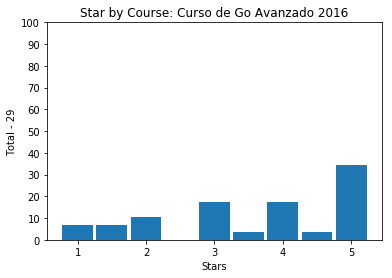

In [472]:
course_id = 445
graph_course_stars(course_id)

# Frequency Distribution

In [473]:
# import re
# review_by_course.comment
# tokens = [word for review in review_by_course.comment for word in re.split(r'\s', review)]

# pattern = r'''(?x)                  # Flag para iniciar el modo verbose
#               (?:[A-Z]\.)+            # Hace match con abreviaciones como U.S.A.
#               | \w+(?:-\w+)*         # Hace match con palabras que pueden tener un guión interno
#               | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
#               | \.\.\.              # Hace match con puntos suspensivos
#               | [][.,;"'?():-_`]    # Hace match con signos de puntuación
# '''
# tokens = [w for w in tokens if re.match(pattern, w)]

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jgmc3012/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jgmc3012/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [474]:
def tokenizate_course(course_id:int):
    review_by_course = reviews[reviews.course_id==course_id]
    tokens = [word.lower() for review in review_by_course.comment
                  for word in word_tokenize(review, 'spanish') if len(word) > 1]
    stopwords_spa = stopwords.words('spanish')
    
    # Clean Token
    clean_tokens = [token for token in tokens if token not in stopwords_spa]

    return clean_tokens

In [475]:
tokenizate_course(course_id)

['tecnologia',
 'nueva',
 'vida',
 'estudio',
 'constancia',
 'aprender',
 'necesario',
 'gracias',
 'aprendí',
 'curso',
 'dieron',
 'capacidad',
 'utilizar',
 'nuevo',
 'framework',
 'revel',
 'excelente',
 'curso',
 'go',
 'avanzado',
 'gustaria',
 'ver',
 'mas',
 'ejemplos',
 'curso',
 'genial',
 'aunque',
 'gustado',
 'mas',
 'variedad',
 'uso',
 'framewors',
 'aparte',
 'revel',
 'gran',
 'curso',
 'formacion',
 'avanzada',
 'go',
 'gran',
 'aporte',
 'comunidad',
 'platzi',
 'gusto',
 'curso',
 'aprendí',
 'bastante',
 'profesor',
 'sabe',
 'falta',
 'mejor',
 'metodología',
 'enseñanza',
 'curso',
 'bastante',
 'abarcativo',
 'sirvió',
 'bastante',
 'base',
 'recomiendo',
 'curso',
 'sirve',
 'entender',
 'funcionamiento',
 'revel',
 'seria',
 'genial',
 'pruebas',
 'desarrollo',
 'sido',
 'probado',
 'menos',
 'dudas',
 'curso',
 'bueno',
 'metodología',
 'forma',
 'explicar',
 'mejor',
 'igual',
 'forma',
 'vale',
 'pena',
 'cursarlo',
 'lenguaje',
 'go',
 'promete',
 'profes

## Graphic

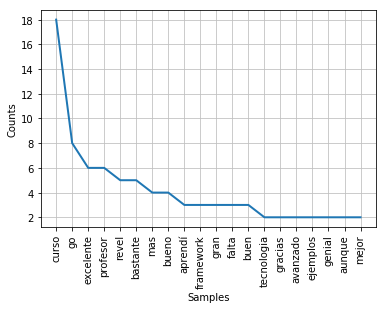

In [476]:
clean_tokens = tokenizate_course(course_id)
fdist = nltk.FreqDist(clean_tokens)
# Graphic
fdist.most_common(20)
fdist.plot(20)

In [477]:
vocabulary = sorted(set(clean_tokens))
vocabulary[:50]

rl = len(vocabulary) / len(clean_tokens)
print(rl)

0.6911196911196911


In [478]:
text = nltk.Text(clean_tokens)
text.collocations() # N-gramas cuya frecuencia de apararición es particularmente alta

bueno profundizar; buen curso; excelente curso; aprendí bastante;
framework revel; revel excelente; curso bueno


In [479]:
fdist.most_common(2)

[('curso', 18), ('go', 8)]